#Import Library

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image

#โหลด Dataset

In [60]:
df = pd.read_csv("music_fav.csv", index_col=0)

In [ ]:
df.head()

,name,lyric
singer,,
URBOYTJ,Selfmade,I'm the way I am\r\nNothing's gonna bring me d...
URBOYTJ,เป็นได้ทุกอย่าง\r\n,Yeah\nวู้\nชอบชวนให้เป็นเพื่อนเธอไปดูหนัง\nชอบ...


In [64]:
lyric = df.lyric

#เริ่มสร้าง WordCloud

ดาวน์โหลดฟอนท์ภาษาไทย TH Sarabun New ทาง https://www.f0nt.com/release/th-sarabun-new/

In [28]:
!pip install pythainlp -q

     |████████████████████████████████| 11.5 MB 15.8 MB/s 


In [29]:
import pythainlp
from pythainlp.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [65]:
lyric.shape[0]

10

In [66]:
texts = []
for i in range(lyric.shape[0]):
  texts += [i for i in word_tokenize(lyric[i],keep_whitespace=False)]
  text = ' '.join(texts)

In [ ]:
text

In [80]:
wordcloud = WordCloud(font_path='THSarabunNew.ttf',
                      background_color="white",
                      width=1024,
                      height=768,
                      max_words=200,
                      collocations=False,
                      colormap='plasma',
                      regexp=r"[ก-๙a-zA-Z']+",
                      stopwords=list(pythainlp.corpus.common.thai_stopwords()) + \
                          ['กับ','แก่','แต่','ต่อ','และ','มี','จะ',
                           #คำเชื่อม
                          'ผม','เธอ','คุณ',
                           #สรรพนาม
                           'นี้','นั้น','โน้น','ไหม']
                      ).generate(text)

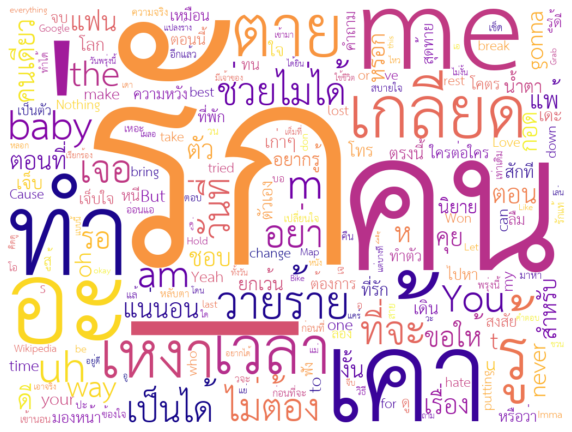

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()